# Packages Loading

In [328]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import plotly.graph_objs as go
#import plotly.plotly as py
# for Machine Learning 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
# form warnings 
import warnings
import os

In [4]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Load data 

In [157]:
cols = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", 
       "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", 
       "height", "curb-weigth", "engine-type", "num-of-cylinders", "engine-size",
       "fuel-system", "bore", "stroke", "compression-rate", "horsepower", "peak-rpm", 
       "city-mpg", "highway-mpg", "price"]
len(cols)

26

In [439]:
data = pd.read_csv("dataset/imports-85.data", names = cols)
data.columns = cols
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Select numerical variables

In [161]:
# Selectionner les variables numériques et continues dans le dataset à partir de la documentation 
continuons_values_cols = ["normalized-losses", "wheel-base", "length", "width", 
                          "height", "curb-weigth", "bore", "stroke", "compression-rate", 
                          "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]


print(len(continuons_values_cols))

14


# Cleaning the dataset

In [163]:
dataset = data[continuons_values_cols]
## Replace ? in data
dataset = dataset.replace("?", np.nan)
dataset = dataset.astype("float")
# Selected the feats columns 
print(dataset.isnull().sum())
# remove the NaN values in price col
dataset = dataset.dropna(subset=['price'])
print("\n")
print("After to remove Na values in price col \n")
print(dataset.isnull().sum())

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weigth           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


After to remove Na values in price col 

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weigth           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64


# Replace the NA Values in dataset

In [444]:
### Replace the NaN values per mean of values 
dataset = dataset.fillna(dataset.mean())
dataset.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weigth          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Standarization

In [168]:
price_col = dataset["price"]
feats = dataset.drop("price", axis = 1)
feats = (feats-feats.min())/(feats.max()- feats.min())
#feats["price"]
feats.head()

,normalized-losses,wheel-base,length,width,height,curb-weigth,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895


In [170]:
X_train, X_test, y_train, y_test =  train_test_split(feats, price_col, test_size=0.25, random_state=222)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 13)
(51, 13)
(150,)
(51,)


# Univariate model

In [447]:
def knn_univariate_model (feats, train_col, target_col): 
    # Split data in ensemble train and test
    X_train, X_test, y_train, y_test = train_test_split(feats, 
                                                        target_col,
                                                        test_size=0.5, 
                                                        random_state=222)
    # instancier un modèle de KNN
    knn = KNeighborsRegressor()
     # entrainer un modèle de KNN
    knn.fit (X_train[[train_col]], y_train)
    # Prédire sur les données de test 
    predicted_labels = knn.predict(X_test[[train_col]])
    # Calculer et retourner les valeurs de RMSE
    mse = mean_squared_error(y_test, predicted_labels)
    rmse = np.sqrt(mse)
    return rmse 

In [449]:
# Call function 
rmse_results = {}
for col in feats.columns: 
    rmse_results[col] = knn_univariate_model(feats= feats, train_col=col, target_col=price_col)
# Show the results 
#pprint(rmse_results)
# Transform the dictionary to pandas series 
rmse_results_series = pd.Series(rmse_results)
rmse_results_series

normalized-losses    7894.315557
wheel-base           6960.096050
length               6194.598358
width                5918.278614
height               7857.510107
curb-weigth          4596.026672
bore                 7143.036896
stroke               8681.924274
compression-rate     7194.272875
horsepower           3966.170747
peak-rpm             8522.179542
city-mpg             5050.600447
highway-mpg          4686.102405
dtype: float64

# Change the value of k

In [452]:
# Change the k values in Model 
def knn_univariate_model_variate_k (feats, train_col, target_col, k_values): 
    # Split data in ensemble train and test
    X_train, X_test, y_train, y_test = train_test_split(feats, 
                                                        target_col,
                                                        test_size=0.3, 
                                                        random_state=222)
    # Create a dictionary to keep the result 
    k_rmses = {}
    for k in k_values:       
        # instancier un modèle de KNN
        knn = KNeighborsRegressor(n_neighbors=k)
         # entrainer un modèle de KNN
        knn.fit (X_train[[train_col]], y_train)
        # Prédire sur les données de test 
        predicted_labels = knn.predict(X_test[[train_col]])
        # Calculer et retourner les valeurs de RMSE
        mse = mean_squared_error(y_test, predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses 

# Call function

In [454]:
features_k_rmse_results = {}
k_values = [1,3,4,5,7,8]
# For each column and k_value, train a model and return the RMSE value 
for col in feats.columns: 
    features_k_rmse_results[col] = knn_univariate_model_variate_k (feats=feats, 
                                                                  train_col=col, 
                                                                  target_col=price_col, 
                                                                   k_values=k_values)

In [456]:
pprint(features_k_rmse_results)

{'bore': {1: 4775.418038520078,
          3: 5125.583301471928,
          4: 5476.992646404639,
          5: 5510.874180096335,
          7: 5624.399879068472,
          8: 5640.723815150985},
 'city-mpg': {1: 4675.003389145786,
              3: 4150.235119637149,
              4: 4368.0193922258,
              5: 4435.020220110263,
              7: 4146.890986606826,
              8: 4303.274183694461},
 'compression-rate': {1: 10757.706879027797,
                      3: 5516.642350828818,
                      4: 5290.157805836772,
                      5: 6058.0063974442455,
                      7: 6113.412301671151,
                      8: 6187.065216447271},
 'curb-weigth': {1: 3533.7187512753126,
                 3: 3264.9665351133135,
                 4: 3291.251180010124,
                 5: 3250.9780234342493,
                 7: 3504.794483756361,
                 8: 3357.006596536649},
 'height': {1: 8743.482809461242,
            3: 7133.648847524065,
            4: 6993

# Find the best features 

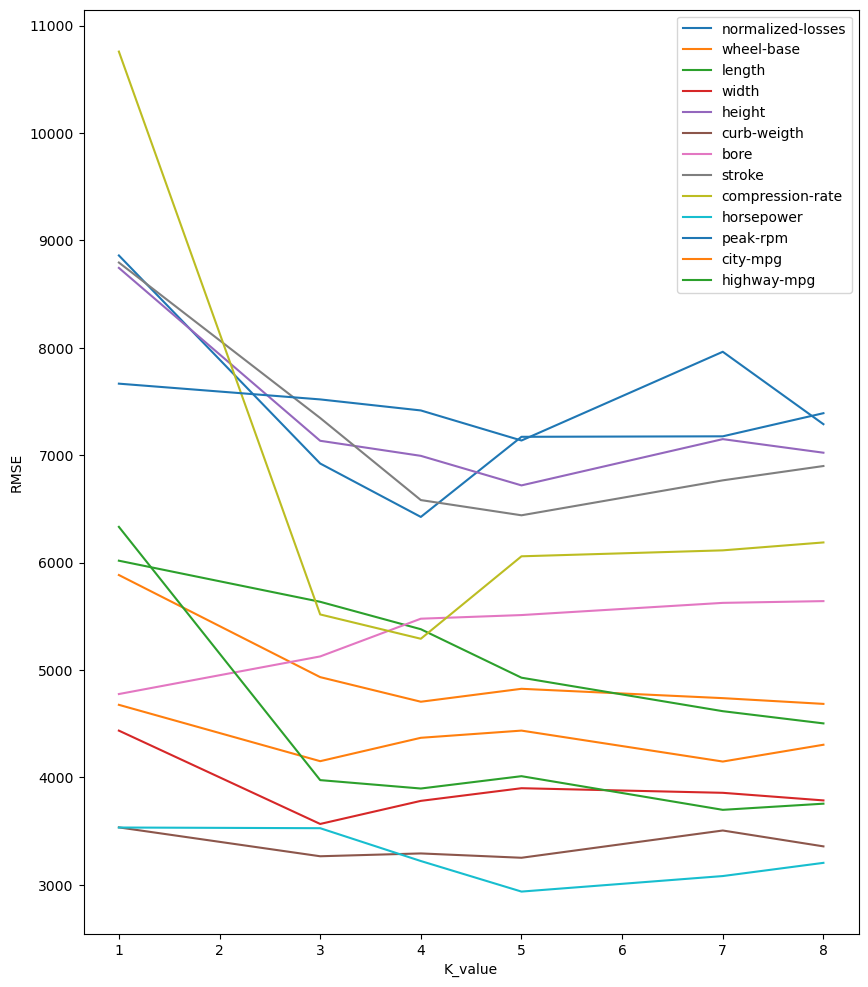

In [461]:
# Visualization the result
best_features = {}
plt.figure(figsize=(10,12))
for key, value in features_k_rmse_results.items(): 
    x = list(value.keys())
    y = list(value.values())
    order = np.argsort(x)
    x_ordered = np.array(x)[order]
    y_ordered = np.array(y)[order]
    best_features[key] = np.mean(y)
    plt.plot(x_ordered, y_ordered, label = key)
    plt.xlabel("K_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

# Sorted features

In [463]:
sorted_features_list = sorted(best_features, key=best_features.get)
sorted_features_list

['horsepower',
 'curb-weigth',
 'width',
 'highway-mpg',
 'city-mpg',
 'wheel-base',
 'length',
 'bore',
 'compression-rate',
 'stroke',
 'height',
 'normalized-losses',
 'peak-rpm']

# Model multiple

In [465]:
def knn_model_multiple(feats, train_col, target_col, k_values): 
    # Split data in ensemble train and test
    X_train, X_test, y_train, y_test = train_test_split(feats, 
                                                        target_col,
                                                        test_size=0.5, 
                                                        random_state=222)
    # Create a dictionary to keep the result 
    k_rmse = {}
    for k in k_values:       
        # instancier un modèle de KNN
        knn = KNeighborsRegressor(n_neighbors=k)
         # entrainer un modèle de KNN
        knn.fit (X_train[train_col], y_train)
        # Prédire sur les données de test 
        predicted_labels = knn.predict(X_test[train_col])
        # Calculer et retourner les valeurs de RMSE
        mse = mean_squared_error(y_test, predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

# Call Function

In [467]:
# variables selections 
k_rmse_features = {}
best_two_features = sorted_features_list[0:2]
best_three_features = sorted_features_list[0:3]
best_four_features = sorted_features_list[0:4]
best_five_features = sorted_features_list[0:5]
best_six_features = sorted_features_list[0:6]
# call function and train model 
k_rmse_features["best_two_rmse"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_two_features, 
                                                     target_col=price_col, 
                                                     k_values=[5])

k_rmse_features["best_three_features"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_three_features, 
                                                     target_col=price_col, 
                                                     k_values=[5])

k_rmse_features["best_four_features"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_four_features, 
                                                     target_col=price_col, 
                                                     k_values=[5])

k_rmse_features["best_five_features"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_five_features, 
                                                     target_col=price_col, 
                                                     k_values=[5])


In [469]:
pprint(k_rmse_features)

{'best_five_features': {5: 3868.2849222367217},
 'best_four_features': {5: 3797.904865622206},
 'best_three_features': {5: 3752.541665865871},
 'best_two_rmse': {5: 3700.1791046294816}}


# Variation of hyperparameters

In [471]:
k_values = [element for element in range(1,25)]
# Call functions
# call function and train model 
k_rmse_features["best_two_rmse"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_two_features, 
                                                     target_col=price_col, 
                                                     k_values=k_values)

k_rmse_features["best_three_features"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_three_features, 
                                                     target_col=price_col, 
                                                     k_values= k_values)

k_rmse_features["best_four_features"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_four_features, 
                                                     target_col=price_col, 
                                                     k_values= k_values)

k_rmse_features["best_five_features"] = knn_model_multiple(feats= feats, 
                                                     train_col=best_five_features, 
                                                     target_col=price_col, 
                                                     k_values=k_values)


In [473]:
pprint(k_rmse_features)

{'best_five_features': {1: 4192.873494229687,
                        2: 3969.551332604003,
                        3: 3453.0330816756323,
                        4: 3755.9380645917877,
                        5: 3868.2849222367217,
                        6: 3948.8242617683086,
                        7: 4076.2490660872936,
                        8: 4187.319673393042,
                        9: 4299.110199764323,
                        10: 4394.73978629087,
                        11: 4517.04912786903,
                        12: 4547.798680454099,
                        13: 4544.754888390295,
                        14: 4562.829274704348,
                        15: 4669.830205773983,
                        16: 4748.369231771202,
                        17: 4866.472969703687,
                        18: 4954.855650013218,
                        19: 5031.216492738863,
                        20: 5101.449282440421,
                        21: 5185.289791240833,
                   

# Visualization of the results

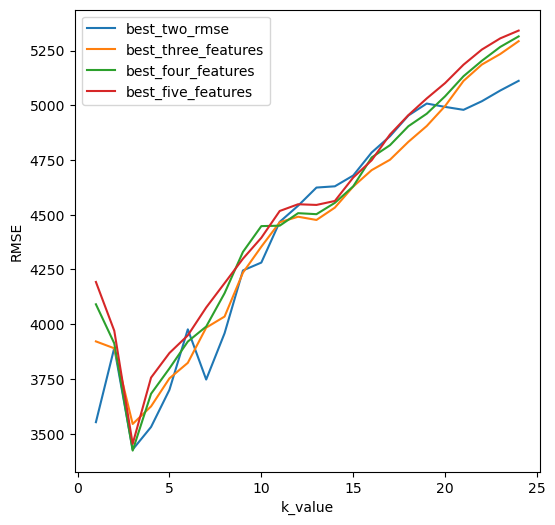

In [475]:
# Visualization of the results 
plt.figure(figsize=(6,6))
for key, value in k_rmse_features.items(): 
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x,y, label = key)
    plt.xlabel("k_value")
    plt.ylabel("RMSE")
plt.legend()
plt.show()

# Cross validation 

In [477]:
def knn_model_multiple_cross_validation(feats,target_col, k_value, n_kFold): 
    # The number of k fold 
    kf = KFold(n_kFold,shuffle = True, random_state = 1)
    # Knn model instance 
    knn = KNeighborsRegressor(n_neighbors=k_value)
    # Cross validation 
    mse = cross_val_score(knn, feats[best_five_features], target_col, 
                         scoring="neg_mean_squared_error",cv=kf)
    # Calcule the rmses 
    rmse =np.sqrt(np.absolute(mse))
    # The mean of rmse 
    mean_rmse = np.mean(rmse)
    
    return  { "rmse" : rmse,
             "mean_rmse":mean_rmse }
# Call function and train model
result = knn_model_multiple_cross_validation(feats=feats, 
                                                     target_col = price_col, 
                                                     k_value=5, 
                                                     n_kFold= 5)
## shwo the result
pprint(result) 

{'mean_rmse': 3004.1364731578865,
 'rmse': array([2183.33784432, 2667.98409628, 3175.5416338 , 4351.37324209,
       2642.4455493 ])}


# Search the optimal of k values

In [480]:
# Search the k_values 
def knn_model_multiple_cross_validation2 (feats, train_col, target_col, k_values, n_kFold): 
    # Split data in ensemble train and test
    X_train, X_test, y_train, y_test = train_test_split(feats, 
                                                        target_col,
                                                        test_size=0.3, 
                                                        random_state=222)
    results_rmse = []
    # Cross validation instance 
    kf = KFold(n_kFold, shuffle=True, random_state=1)
    # # running for different K values to know which yields the max accuracy 
    for k in k_values: 
        knn = KNeighborsRegressor(n_neighbors=k, weights="distance", p = 2) # Model instance 
        #knn.fit(X_train[train_col], y_test)
        ## Score of the test 
        mse = cross_val_score(knn,
                                X_train[train_col],
                                y_train,
                                scoring="neg_mean_squared_error",
                                cv = kf)
        rmse = np.sqrt(np.absolute(mse))
        # keep the result
        results_rmse.append(rmse.mean())
    return results_rmse

In [482]:
# Train and test model 
k_values = [element for element in range(1,20,2)]
results_rmse = knn_model_multiple_cross_validation2 (feats = feats,
                                                     train_col =best_five_features,
                                                      target_col = price_col, 
                                                     k_values = k_values, 
                                                     n_kFold =5)

results_rmse

[2812.83546613005,
 2620.204348232074,
 2740.3955989280494,
 2881.5119261625655,
 3081.139764720462,
 3243.158202332451,
 3346.58144226229,
 3433.8420623115408,
 3487.357639316991,
 3498.277563456694]

# Visualization the result with plotly

[]

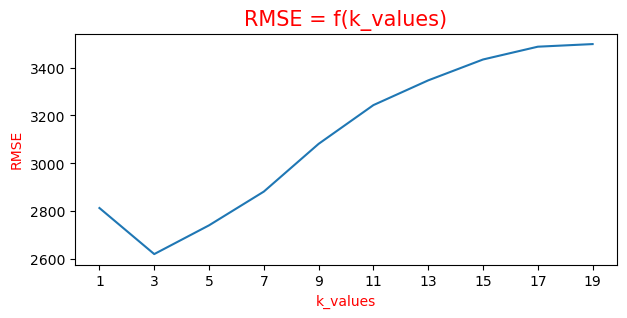

In [543]:
plt.figure(figsize=(7,3))

plt.plot(k_values, results_rmse)
plt.xlabel("k_values", color = "red")
plt.ylabel("RMSE", color = "red")
plt.title("RMSE = f(k_values)", color = "red", size = 15)
plt.xticks(np.arange(1,20, 2), k_values)

#plt.xticks(np.linspace(-20, 20, len(labels)), labels)

plt.plot()

# Training Model on Optimal k

In [379]:
optimal_k = k_values[results_rmse.index(min(results_rmse))]
print("Optimal k:", optimal_k)

Optimal k: 3


In [491]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(feats, 
                                                        price_col,
                                                        test_size=0.3, 
                                                        random_state=222)
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train[best_five_features], y_train)
# Prediction 
predicted_labels = knn_optimal.predict(X_test[best_five_features])
# Calcul the rmse 
mse  = mean_squared_error(y_test, predicted_labels)
rmse = np.sqrt(mse)
# Calcul the accuracy, La précision sur les données de test
score = knn_optimal.score(X_test[best_five_features], y_test)
## Show the result 
print("Accuracy :", round(score*100,3), "%")
print("RMSE Error :", round(rmse,3))

Accuracy : 88.839 %
RMSE Error : 2396.93


# Visualization of the result

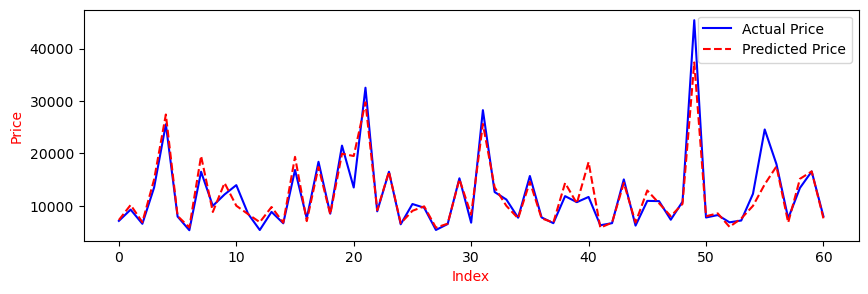

In [591]:
plt.figure(figsize=(10,3))

X = np.arange(len(y_test))
plt.plot(X, y_test, color = "blue", label = "Actual Price")
plt.plot(X, predicted_labels, "r--", label = "Predicted Price")
plt.xlabel("Index", color = "red")
plt.ylabel("Price", color = "red")
plt.legend(loc = "best")
plt.show()